<a href="https://colab.research.google.com/github/WKR01/PUM/blob/main/PUMtree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

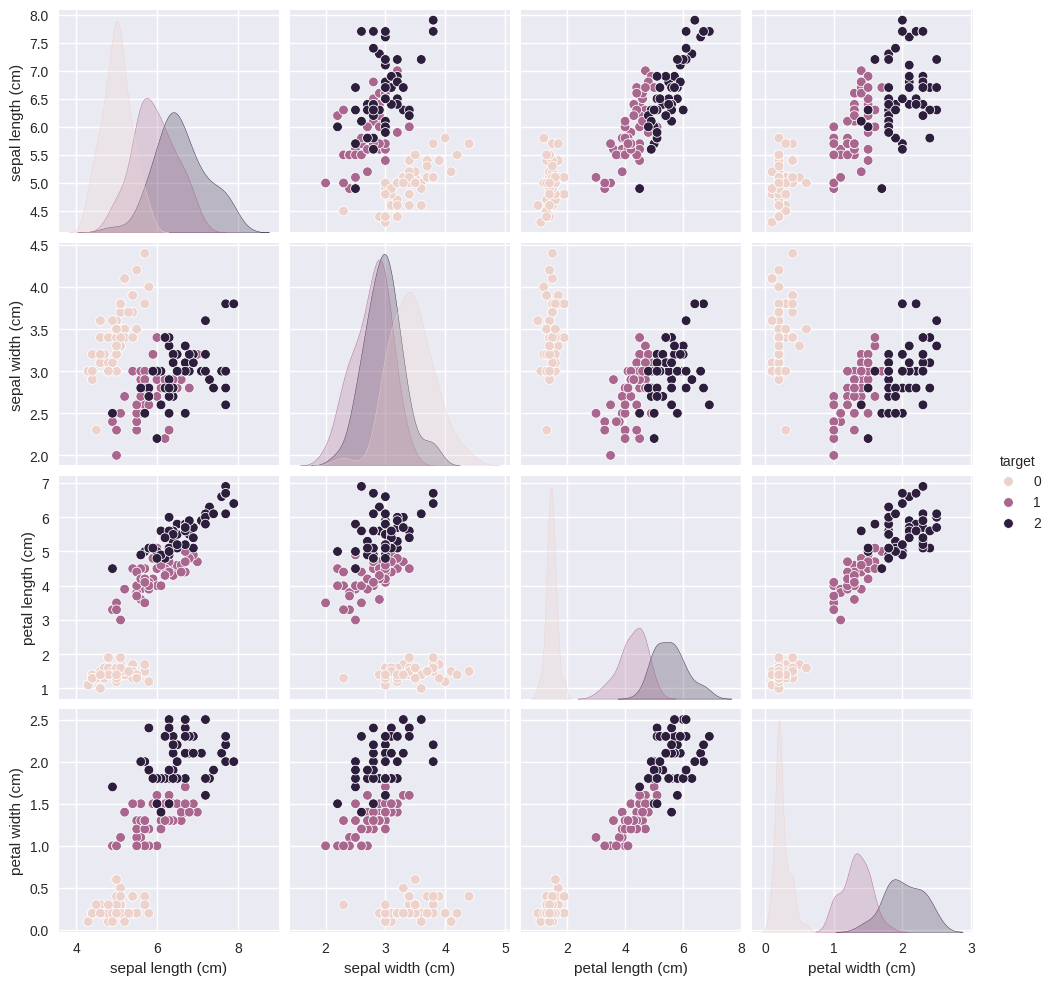

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

# Konwertuj dane na obiekt DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Wizualizacja
sns.pairplot(df, hue='target')
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mutual_info_score

# Załaduj dane
X_petal_width = X[:, 3]  # petal width (cm)
# Podziały
split_a = X_petal_width <= 0.5
split_b = X_petal_width <= 0.38

# Entropia przed podziałami
entropy_before = mutual_info_score(y, X_petal_width)

# Entropia po podziale A
entropy_after_a = (sum(split_a) / len(X_petal_width)) * mutual_info_score(y[split_a], X_petal_width[split_a]) + \
                   (sum(~split_a) / len(X_petal_width)) * mutual_info_score(y[~split_a], X_petal_width[~split_a])

# Zysk informacyjny podziału A
information_gain_a = entropy_before - entropy_after_a

# Entropia po podziale B
entropy_after_b = (sum(split_b) / len(X_petal_width)) * mutual_info_score(y[split_b], X_petal_width[split_b]) + \
                   (sum(~split_b) / len(X_petal_width)) * mutual_info_score(y[~split_b], X_petal_width[~split_b])

# Zysk informacyjny podziału B
information_gain_b = entropy_before - entropy_after_b

print("Zysk informacyjny dla podziału A (0.5):", information_gain_a)
print("Zysk informacyjny dla podziału B (0.38):", information_gain_b)



Zysk informacyjny dla podziału A (0.5): 0.5991131442804256
Zysk informacyjny dla podziału B (0.38): 0.4294149725072026


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/p

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Drzewo decyzyjne
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Dokładność drzewa decyzyjnego:", dt_accuracy)

# Las losowy
rf_classifier = RandomForestClassifier(n_estimators=15)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Dokładność lasu losowego:", rf_accuracy)


Dokładność drzewa decyzyjnego: 1.0
Dokładność lasu losowego: 1.0
